# Predicting house prices

### 1 Data loading and initial data review

In [1]:
import pandas as pd

data = pd.read_csv('kc_house_data.csv', index_col='id')

In [2]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


I check duplicates:

In [3]:
data[data.duplicated()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


There are no duplicates.

I check the attributes, types and basic data statistics:

In [4]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 2 Check for missing values

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(total, columns=['sum'])
missing_data.head(5)

,sum
sqft_lot15,0
sqft_living15,0
price,0
bedrooms,0
bathrooms,0


No missing values

### 3 Date

Dates are entered with the accuracy of days.

In [8]:
from dateutil.parser import isoparse, parse
import datetime

def parse_date(x):
    d = isoparse(x)
    if (d.hour == 0 and d.minute == 0) and d.second == 0:
        return datetime.date(d.year, d.month, d.day)
    

data['date_1'] = data['date'].apply(parse_date)
data['year'] = pd.DatetimeIndex(data['date_1']).year
data['month'] = pd.DatetimeIndex(data['date_1']).month
data['day'] = pd.DatetimeIndex(data['date_1']).day

data = data.drop(['date', 'date_1'], axis=1)

In [9]:
print(data['year'].value_counts())
print(data['month'].value_counts())
print(data['day'].value_counts())

2014    14633
2015     6980
Name: year, dtype: int64
5     2414
4     2231
7     2211
6     2180
8     1940
10    1878
3     1875
9     1774
12    1471
11    1411
2     1250
1      978
Name: month, dtype: int64
23    906
9     808
5     807
24    801
20    787
16    759
17    748
27    745
22    742
13    741
25    740
8     740
2     737
10    732
12    719
6     719
18    717
11    700
3     682
4     679
26    670
29    659
21    658
14    655
7     650
19    646
15    623
28    612
30    611
1     569
31    251
Name: day, dtype: int64


### 4 Attributes

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

data_hist = data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'year', 'month', 'day']]

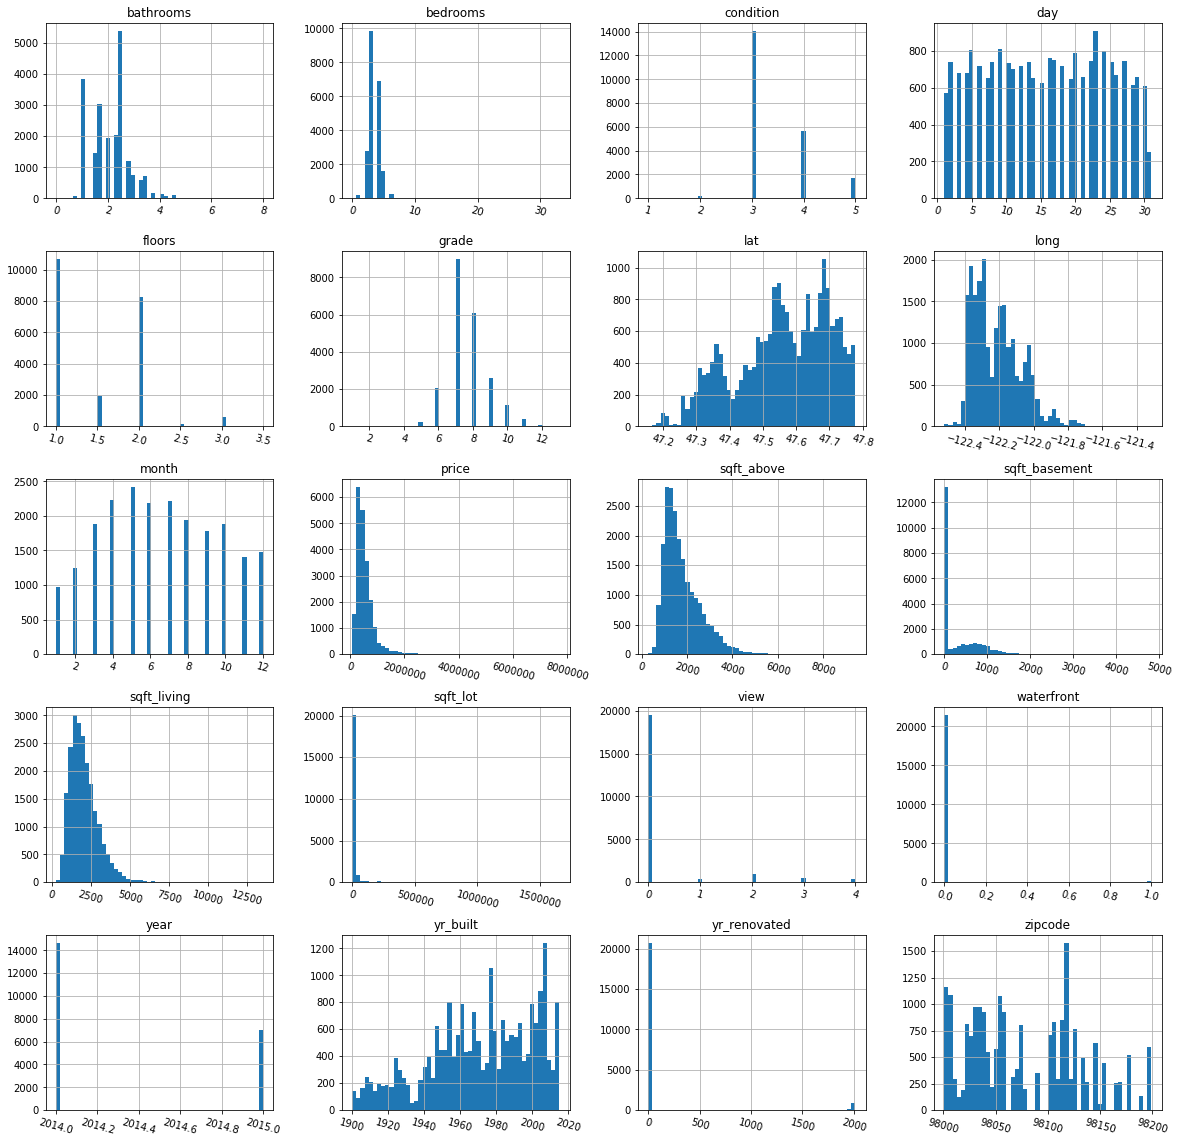

In [11]:
hists = data_hist.hist(bins=50, figsize=(20,20), xlabelsize='10', ylabelsize='10', xrot=-15)

### 5 Data types

* <b>Numerical data</b>
    * Discrete
        * bedrooms
        * bathrooms
        * floors
        * year
        * month
        * day
        * yr_renovated
        * yr_built
    * Continuous
        * price
        * sqft_living
        * sqft_lot
        * sqft_above
        * sqft_basement
        * lat
        * long
        
        
* <b>Categorical data</b>
    * Ordinal
        * view
        * condition
        * grade
    * Nominal
        * zipcode
        * waterfront

### 6 Bedrooms

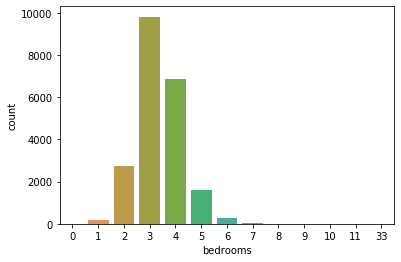

In [12]:
sns.countplot(data['bedrooms'])
plt.show()

### 7 Bathrooms

In [13]:
from collections import Counter

sorted(Counter(data['bathrooms']).keys())

[0.0,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.5,
 7.75,
 8.0]

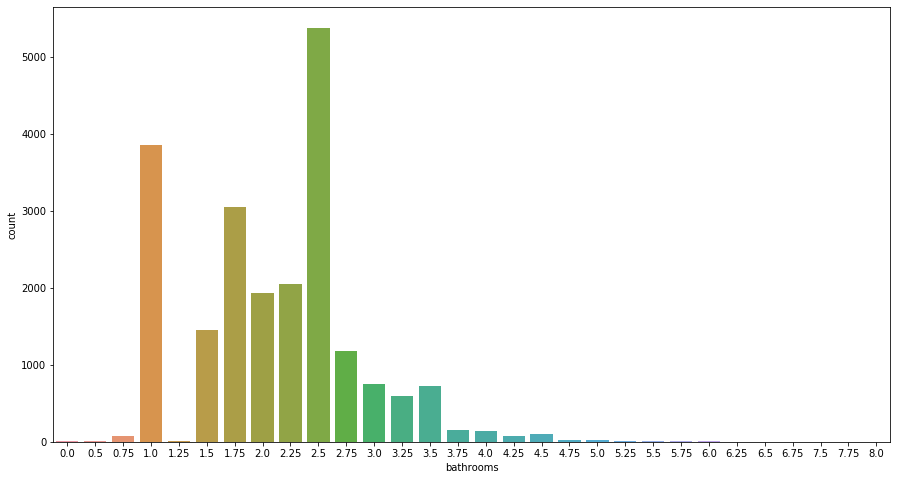

In [14]:
plt.subplots(figsize=(15, 8))
sns.countplot(data['bathrooms'])
plt.show()

### 8 Floors

In [15]:
sorted(Counter(data['floors']).keys())

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]

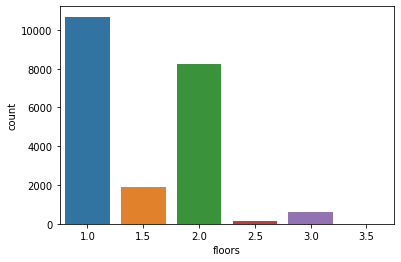

In [16]:
sns.countplot(data['floors'])
plt.show()

### 9 Sqft_living

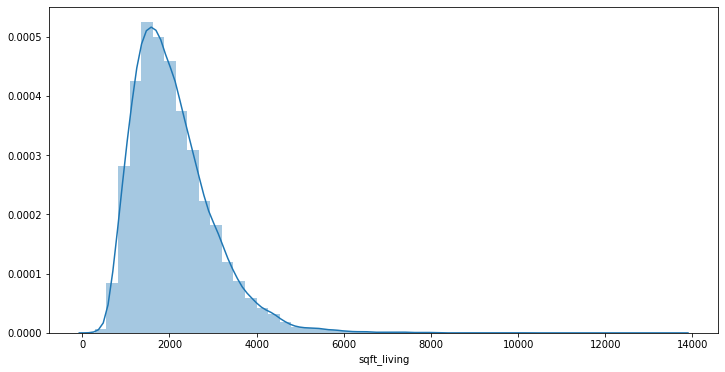

In [17]:
plt.subplots(figsize=(12, 6))
sns.distplot(data['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)
plt.show()

### 10 Sqft_above

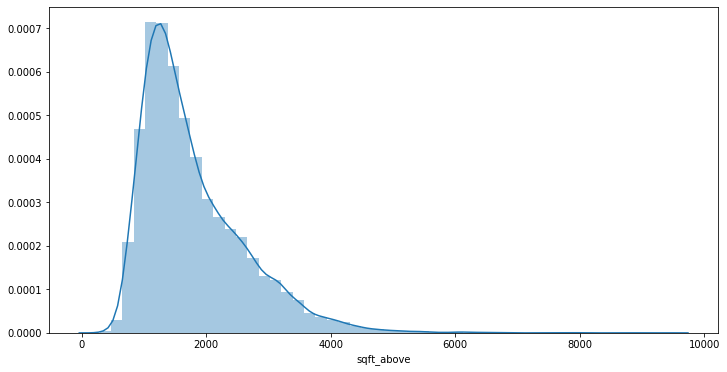

In [18]:
plt.subplots(figsize=(12, 6))
sns.distplot(data['sqft_above'], hist=True, kde=True, rug=False, label='sqft_above', norm_hist=True)
plt.show()

### 11 Zipcode

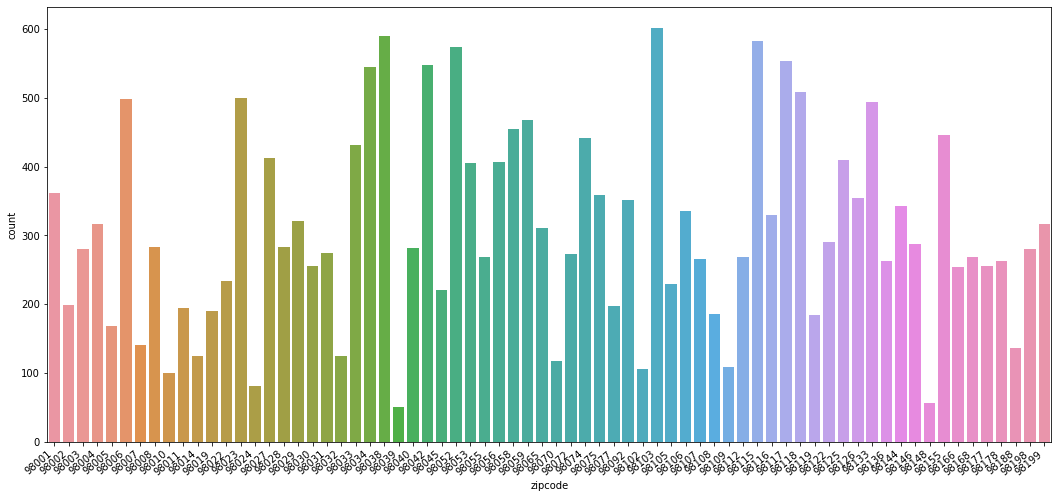

In [19]:
import seaborn as sns

plt.subplots(figsize=(18, 8))
ax = sns.countplot(data['zipcode'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

### 12 Yr_renovated 

I'm inserting the year of renovation into the year of built. I delete the column with the built date.

In [20]:
data['renovated'] = data.apply(lambda x: x['yr_renovated'] if x['yr_renovated'] != 0 else x['yr_built'], axis=1)

In [21]:
data = data.drop('yr_renovated', axis=1)

## 13 Target

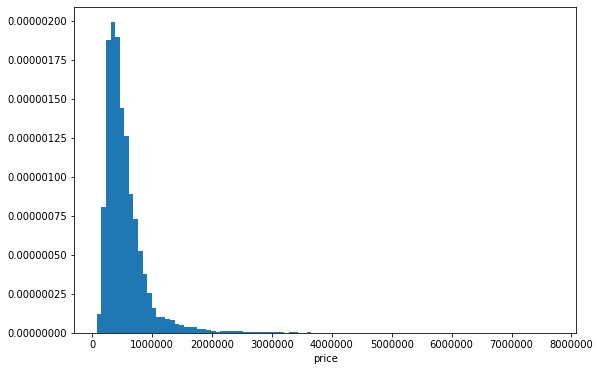

In [22]:
plt.subplots(figsize=(9, 6))
plt.hist(data['price'], bins=100, density=True)
plt.xlabel('price')
plt.show()

In [23]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

/home/angelika/.virtualenvs/data_science/lib/python3.6/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


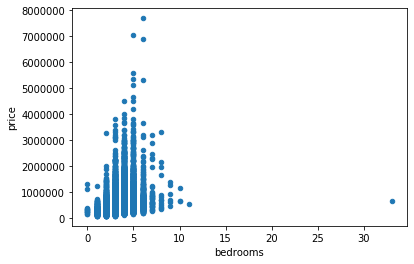

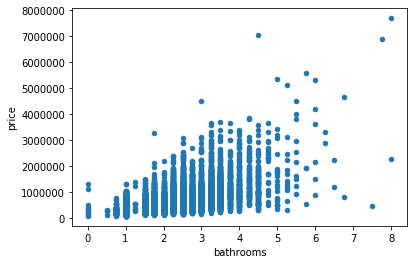

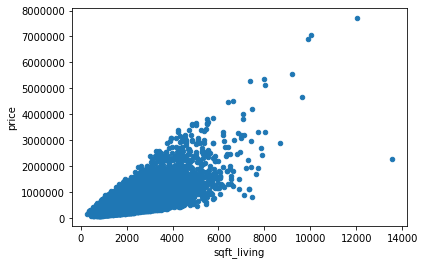

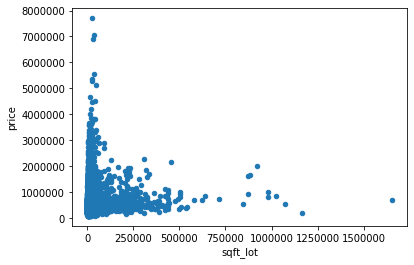

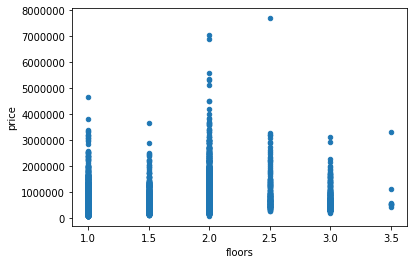

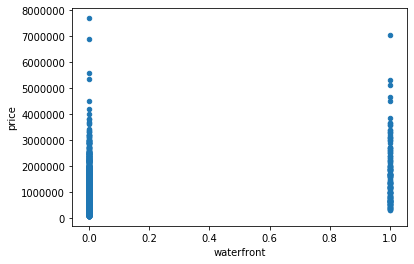

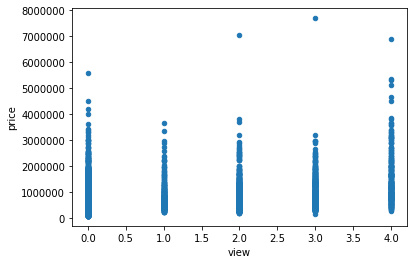

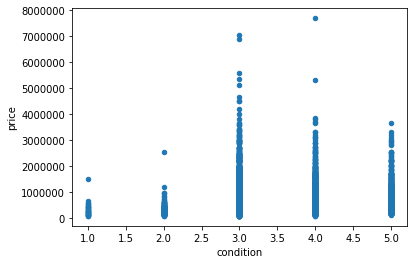

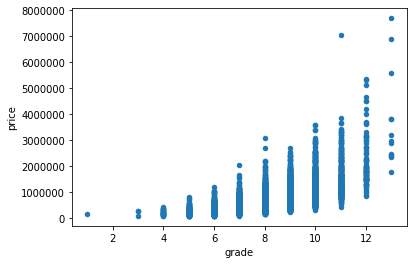

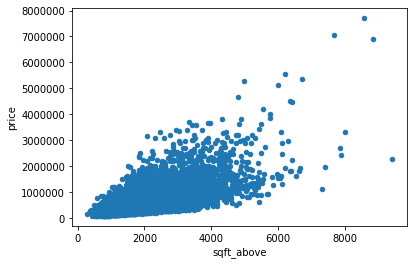

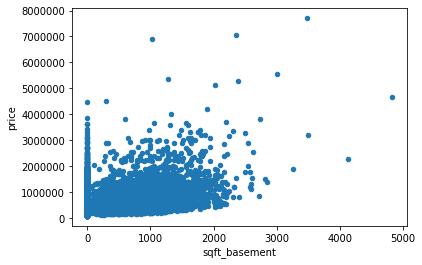

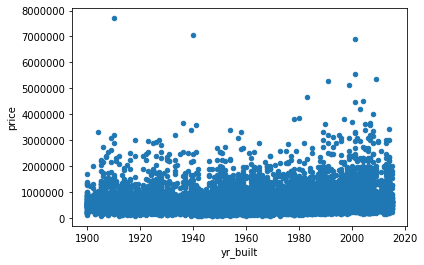

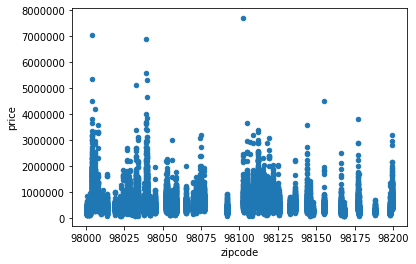

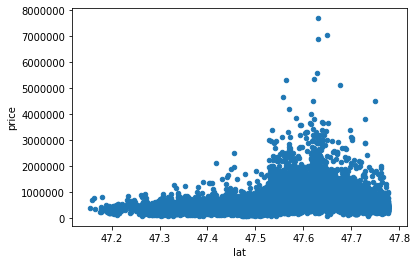

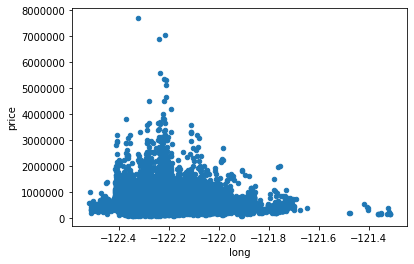

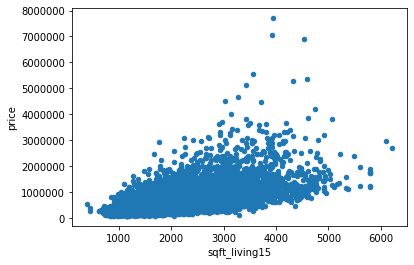

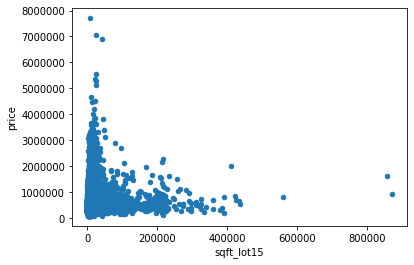

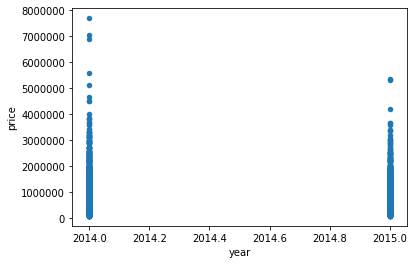

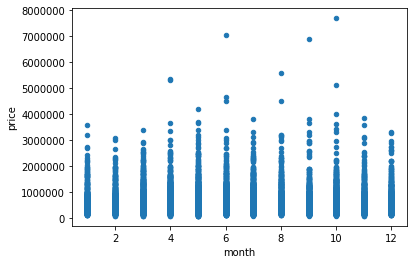

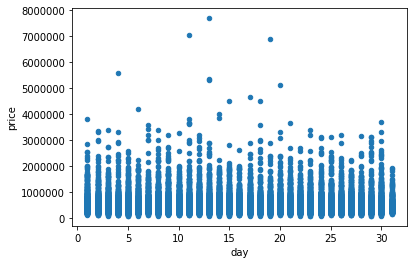

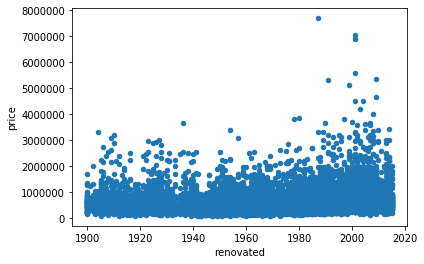

In [24]:
data_plot = data.drop(['price'], axis=1)

for col in data_plot.columns:
    data_t = pd.concat([data['price'], data[col]], axis=1)
    data_t.plot.scatter(x=col, y='price')

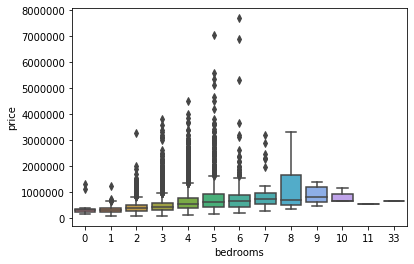

In [25]:
sns.boxplot(x=data['bedrooms'], y=data['price'])
plt.show()

## 14 Correlation between variables

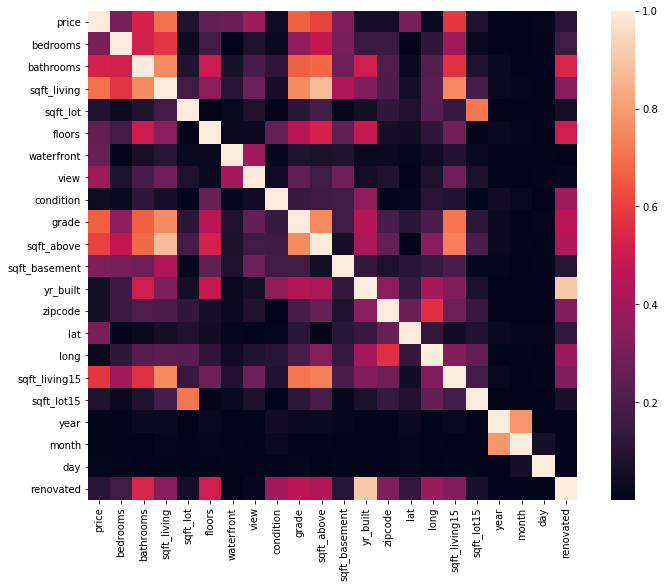

In [26]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(abs(corrmat), square=True);

Correlation with <i>price</i>:

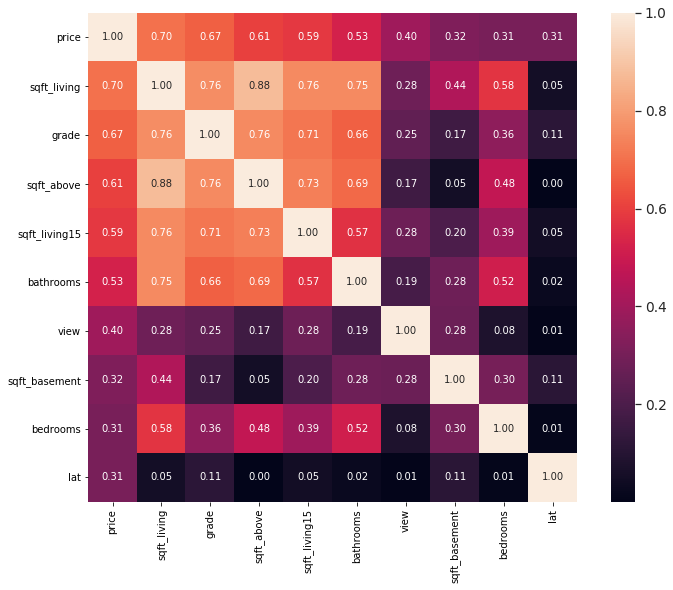

In [27]:
import numpy as np
np.random.seed(100)

k = 10
cols = corrmat.nlargest(k, 'price')['price'].index
cm = abs(np.corrcoef(data[cols].values.T))
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 15 Gradient Boosting

In [28]:
X, y = data.drop(['price'], axis=1), data['price']

In [29]:
X['zipcode'] = X['zipcode'].astype('object')

In [30]:
X.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
day                int64
renovated        float64
dtype: object

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_features = X.select_dtypes(include='object').columns

numeric_transformer_lin = Pipeline(steps=[('scaler', StandardScaler())])
numeric_features_lin = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor_lin = ColumnTransformer(transformers=[
    ('num', numeric_transformer_lin, numeric_features_lin),
    ('cat', categorical_transformer, categorical_features)
])

In [32]:
pipe_lin = Pipeline(steps=[('preprocessor', preprocessor_lin)])

In [33]:
X = pipe_lin.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 16 Feature importances

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500,
          'random_state': 0}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

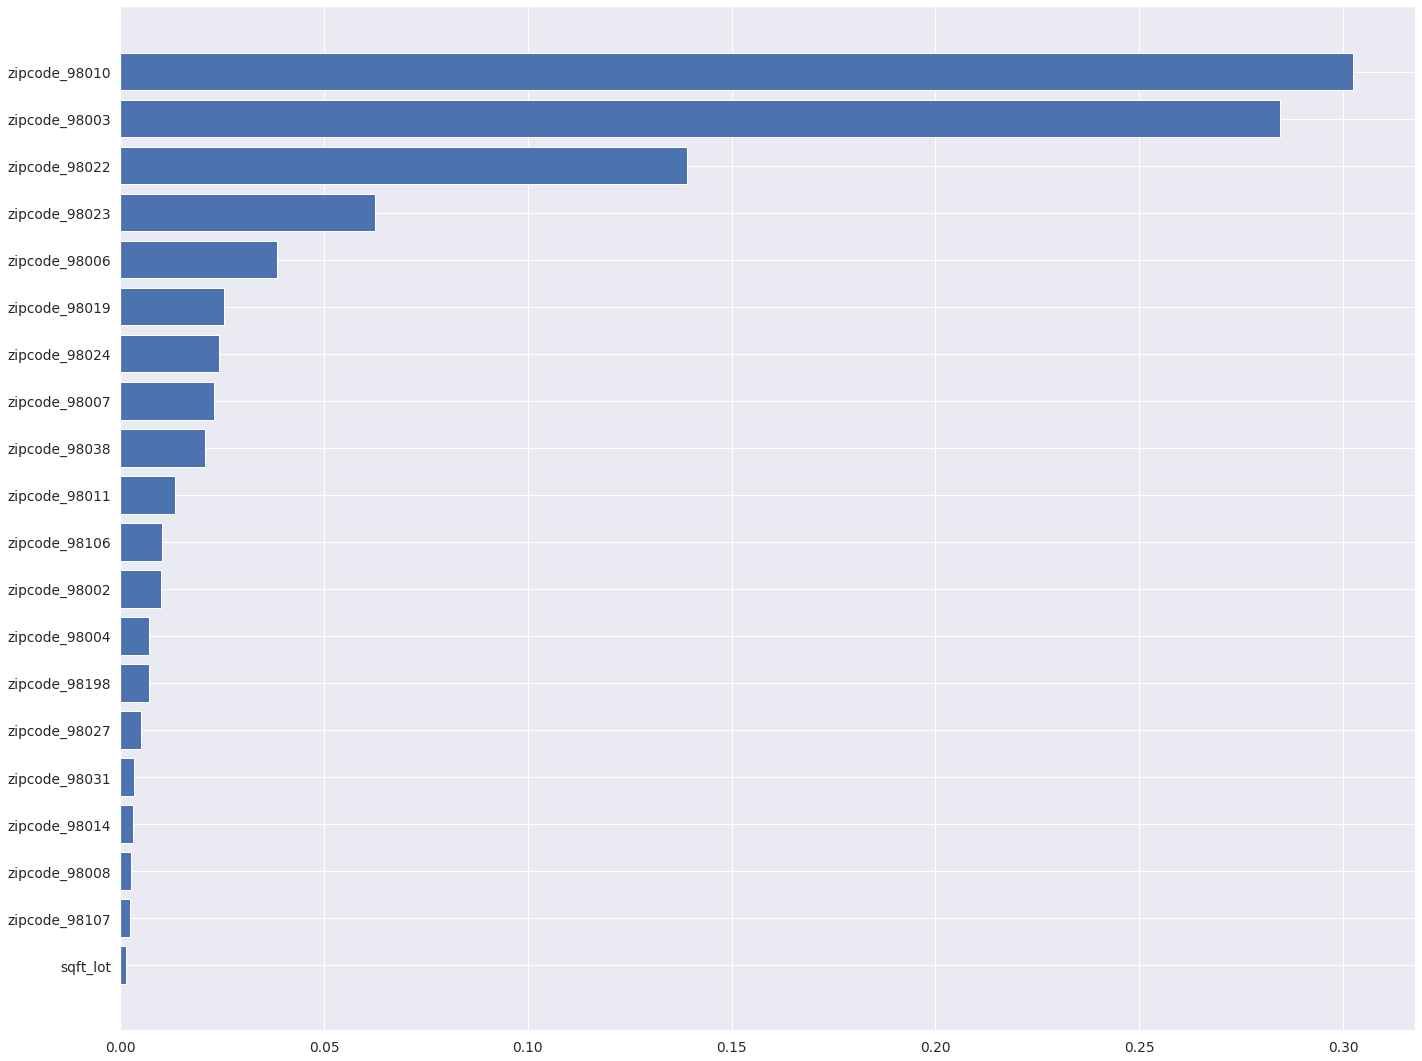

In [36]:
one_hot_encoding = (pipe_lin.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'])
feature_names = one_hot_encoding.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features_lin]

feature_importances = reg.feature_importances_
sorted_index = feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax.barh(y_ticks[-20:], feature_importances[sorted_index][-20:])
ax.set_yticklabels(feature_names[sorted_index][-20:])
ax.set_yticks(y_ticks[-20:])
fig.tight_layout()
plt.show()

### 17 Cross validation (Gradient Boosting)

In [37]:
X, y = data.drop(['price'], axis=1), data['price']
X['zipcode'] = X['zipcode'].astype('object')

In [38]:
X.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
day                int64
renovated        float64
dtype: object

In [39]:
r2_score_, neg_mse_score = [], []
name_regressor = []

In [40]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

params = {'n_estimators': 200,
          'learning_rate': 0.3,
          'random_state': 0}

# param_grid =    { 'classifier__n_estimators' : [200],
#     'classifier__learning_rate' : [0.03, 0.06, 0.1, 0.3, 0.6]} 

pipe_lin = Pipeline(steps=[('preprocessor', preprocessor_lin), ('classifier', GradientBoostingRegressor(**params))])
score = cross_validate(pipe_lin, X, y, scoring=['r2','neg_mean_squared_error'])
 
r2_score_.append(score['test_r2'].mean())
neg_mse_score.append(score['test_neg_mean_squared_error'].mean())
name_regressor.append('Gradient Boosting')
    
print('R^2: %.3f' % score['test_r2'].mean())
print('Negative MSE %.3f' % score['test_neg_mean_squared_error'].mean())

R^2: 0.887
Negative MSE -15192723646.333


### 18 Random forest 

In [41]:
from sklearn.ensemble import RandomForestRegressor

# param_grid = {
#     'classifier__max_features': ["sqrt", 3, "auto", 6],
#     'classifier__n_estimators': [100, 200, 300, 500]
# }

params = {'n_estimators': 200,
          'max_features': 'auto',
          'random_state': 0}

pipe_lin = Pipeline(steps=[('preprocessor', preprocessor_lin), ('classifier', RandomForestRegressor(**params))])
score = cross_validate(pipe_lin, X, y, scoring=['r2','neg_mean_squared_error'])

r2_score_.append(score['test_r2'].mean())
neg_mse_score.append(score['test_neg_mean_squared_error'].mean())
name_regressor.append('Lasy losowe')

print('R^2: %.3f' % score['test_r2'].mean())
print('Negative MSE %.3f' % score['test_neg_mean_squared_error'].mean())

R^2: 0.876
Negative MSE -16715198133.655


### 19 Linear regression

In [42]:
# CV = GridSearchCV(pipe_lin, param_grid, n_jobs= 1, scoring='neg_mean_squared_error', refit='best_score_')                 
# cv = CV.fit(X, y)
# print(CV.best_params_)

In [43]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
from sklearn.preprocessing import PolynomialFeatures

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_features = X.select_dtypes(include='object').columns

numeric_transformer_lin = Pipeline(steps=[('poly', PolynomialFeatures(2)), ('scaler', StandardScaler())])
numeric_features_lin = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor_lin = ColumnTransformer(transformers=[
    ('num', numeric_transformer_lin, numeric_features_lin),
    ('cat', categorical_transformer, categorical_features)
])

pipe_lin = Pipeline(steps=[('preprocessor', preprocessor_lin), ('classifier', linear_model.LinearRegression())])
score = cross_validate(pipe_lin, X, y, scoring=['r2','neg_mean_squared_error'])
    
r2_score_.append(score['test_r2'].mean())
neg_mse_score.append(score['test_neg_mean_squared_error'].mean())
name_regressor.append('Regresja liniowa')    
    
print('r2', score['test_r2'].mean())
print('neg_mean squared', score['test_neg_mean_squared_error'].mean())

r2 0.8729804384088166
neg_mean squared -17068669063.851643


### 20 K-Nearest neighbors

In [45]:
from sklearn.neighbors import KNeighborsRegressor

pca = PCA(n_components=15)

pipe_lin = Pipeline(steps=[('preprocessor', preprocessor_lin), ('pca', pca), ('classifier', KNeighborsRegressor(weights='distance', n_neighbors=10))])
score = cross_validate(pipe_lin, X, y, scoring=['r2','neg_mean_squared_error'])

r2_score_.append(score['test_r2'].mean())
neg_mse_score.append(score['test_neg_mean_squared_error'].mean())
name_regressor.append('Najbliżsi sąsiedzi')
    
print('r2', score['test_r2'].mean())
print('neg_mean squared', score['test_neg_mean_squared_error'].mean())

r2 0.7169345855734083
neg_mean squared -38178518831.94388


## 21 Results

In [46]:
r2_score_ = [round(x, 3) for x in r2_score_]
neg_mse_score = [round(x, 3) for x in neg_mse_score]


result_reg = pd.DataFrame({'R2': r2_score_, 'Neg MSE': neg_mse_score}, index=name_regressor)

In [47]:
result_reg

,R2,Neg MSE
Gradient Boosting,0.887,-1.519272e+10
Lasy losowe,0.876,-1.671520e+10
Regresja liniowa,0.873,-1.706867e+10
Najbliżsi sąsiedzi,0.717,-3.817852e+10
